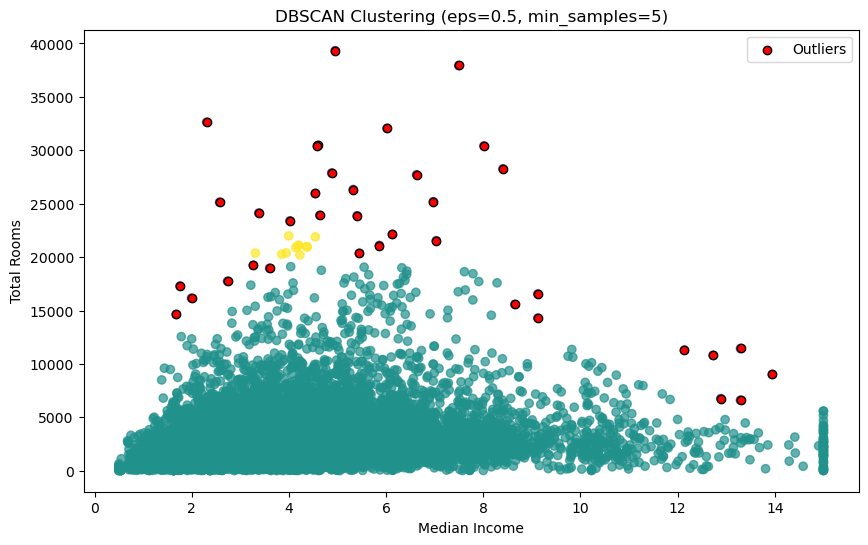

eps=0.3, min_samples=3 → Outliers detected: 60
eps=0.3, min_samples=5 → Outliers detected: 99
eps=0.3, min_samples=10 → Outliers detected: 218
eps=0.5, min_samples=3 → Outliers detected: 23
eps=0.5, min_samples=5 → Outliers detected: 37
eps=0.5, min_samples=10 → Outliers detected: 60
eps=0.7, min_samples=3 → Outliers detected: 14
eps=0.7, min_samples=5 → Outliers detected: 26
eps=0.7, min_samples=10 → Outliers detected: 35


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

selected_features = ["median_income", "total_rooms"]
X = df[selected_features].dropna() 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps_value = 0.5 
min_samples_value = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X_scaled)

df["cluster"] = clusters  

plt.figure(figsize=(10, 6))
plt.scatter(X["median_income"], X["total_rooms"], c=clusters, cmap="viridis", alpha=0.7)
plt.xlabel("Median Income")
plt.ylabel("Total Rooms")
plt.title(f"DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})")
outliers = df[df["cluster"] == -1]
plt.scatter(outliers["median_income"], outliers["total_rooms"], color="red", label="Outliers", edgecolors="black")
plt.legend()
plt.show()
for eps_test in [0.3, 0.5, 0.7]:
    for min_samples_test in [3, 5, 10]:
        dbscan_test = DBSCAN(eps=eps_test, min_samples=min_samples_test)
        clusters_test = dbscan_test.fit_predict(X_scaled)
        num_outliers = np.sum(clusters_test == -1)
        print(f"eps={eps_test}, min_samples={min_samples_test} → Outliers detected: {num_outliers}")
